In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")
if groq_api_key is None:
    raise ValueError("GROQ_API_KEY environment variable is not set")
os.environ["GROQ_API_KEY"] = groq_api_key

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.3-70b-versatile")

In [18]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image ,display

class State(TypedDict):
    name:str
    career:str
    education:str
    year:str
    advise:str

In [19]:
def generate_career_advise(state:State):
    msg=llm.invoke(f"""
                   You are an expert career adviser.
                   Generate a detailed career plan for user whose name is {state["name"]}.
                   User wants to build a career in {state['career']}.
                   User's educational qualifications are: {state['education']}.
                   User is currently studying in {state['year']}.
                   Create the career plan in MarkDown formatting.
    """)
    return {"advise":msg.content}

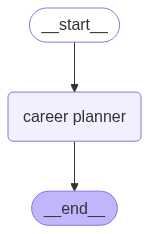

In [20]:
graph = StateGraph(State)

graph.add_node("career planner", generate_career_advise)
graph.add_edge(START,"career planner")
graph.add_edge("career planner",END)

compiled_graph = graph.compile()

graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [21]:
from IPython.display import Markdown

name = "Soham"
career = "AI Developer"
education = "Bachelors in Technology"
year = "Final Year of Computer Engineering"

state = compiled_graph.invoke({
    "name":name,
    "career":career,
    "education":education,
    "year":year
})

In [22]:
Markdown(state['advise'])


### Career Plan for Soham: AI Developer
#### Introduction
As a final-year computer engineering student, Soham has a solid foundation in computer science and is well-positioned to pursue a career in AI development. This career plan outlines the steps Soham can take to achieve his goal of becoming an AI developer.

#### Short-Term Goals (Next 6-12 months)
##### 1. **Complete Bachelor's Degree**
* Finish the final year of computer engineering with a strong academic record
* Focus on courses related to artificial intelligence, machine learning, and data structures

##### 2. **Gain Practical Experience**
* Participate in hackathons, coding challenges, and AI-themed competitions to apply theoretical knowledge
* Collaborate with peers on projects that involve AI and machine learning
* Contribute to open-source AI projects on platforms like GitHub or Kaggle

##### 3. **Develop Essential Skills**
* Programming languages: Python, Java, C++
* AI frameworks: TensorFlow, PyTorch, Keras
* Data structures and algorithms: arrays, linked lists, stacks, queues, trees, graphs
* Familiarity with cloud platforms: AWS, Google Cloud, Azure

##### 4. **Build a Personal Project**
* Design and develop a personal AI project, such as:
	+ Image classification using convolutional neural networks (CNNs)
	+ Natural language processing (NLP) for text analysis
	+ Chatbot development using dialogue management systems

#### Mid-Term Goals (Next 1-2 years)
##### 1. **Pursue a Master's Degree (Optional)**
* Consider pursuing a master's degree in AI, machine learning, or a related field to enhance knowledge and skills
* Research universities and programs that align with Soham's interests and career goals

##### 2. **Gain Industry Experience**
* Intern or co-op with companies that specialize in AI development
* Network with professionals in the field to learn about new trends and opportunities
* Participate in industry conferences, meetups, and workshops to stay updated on the latest advancements

##### 3. **Develop Specialized Skills**
* Deep learning: recurrent neural networks (RNNs), long short-term memory (LSTM) networks
* Computer vision: object detection, segmentation, tracking
* NLP: sentiment analysis, topic modeling, language translation

##### 4. **Create a Professional Online Presence**
* Build a professional website or blog to showcase projects, skills, and experiences
* Establish a strong LinkedIn profile and connect with professionals in the AI community

#### Long-Term Goals (Next 2-5 years)
##### 1. **Become a Specialist in AI Development**
* Focus on a specific area of AI, such as computer vision, NLP, or robotics
* Develop expertise in that area through continuous learning, research, and project development

##### 2. **Lead Projects and Teams**
* Take on leadership roles in AI development projects, guiding teams and mentoring junior developers
* Collaborate with cross-functional teams to integrate AI solutions into larger products or systems

##### 3. **Publish Research and Present at Conferences**
* Publish research papers on AI-related topics in reputable journals or conferences
* Present at industry conferences, meetups, or workshops to share knowledge and expertise

##### 4. **Stay Current with Industry Advancements**
* Continuously update skills and knowledge to keep pace with the rapidly evolving AI landscape
* Participate in online forums, discussions, and webinars to stay informed about new trends and breakthroughs

#### Conclusion
By following this career plan, Soham can set himself up for success in the field of AI development. With a strong foundation in computer science, practical experience, and continuous learning, Soham can become a skilled AI developer and achieve his long-term career goals.